# ファイルの読み込み

In [1]:
f = open("test.txt", "r")
for line in f:  # 1行ずつ読む
    print(line)
f.close()

abc

123


In [3]:
f = open("test.txt", "r")
whole = f.read()  # 一気に読む
print(whole)
f.close()

abc
123


In [6]:
f = open("test.txt", "r")
line = f.readline()  # 1行ずつ読む（イテレータ不使用）
for i in line:
    print(line)
    line = f.readline()
f.close()

abc

123




In [8]:
f = open("test.txt", "r")
lines = f.readlines()  # 一気に読んで、1行ずつリストにする
for lin in lines:
    print(lin)
f.close()

abc

123


In [9]:
# withによる安全なclose
with open("test.txt", "r") as f:
    whole = f.read()
    print(whole)

abc
123


# ファイルの書き出し

In [13]:
wlist = ["C++", " ", "Java", " ", "Python"]
with open("test.txt", "a") as f:
    f.write("Programming Languages\n")
    f.writelines(wlist)  # 改行やスペース、区切りなどはなく連結のみ

In [14]:
with open("test.txt", "r") as f:
    whole = f.read()
    print(whole)

abc
123Programming Languages
C++ Java Python


In [27]:
import csv

with open("test.csv", "r") as f:
    dat = [k for k in csv.reader(f)]  # カンマ区切りごとに読む(1行：文字列のリスト)
print(dat)

[['abc', '123']]


In [28]:
dat[0].append("あいうえお")
dat.append(["ABC", "１２３", "亜伊宇絵尾"])
print(dat)

[['abc', '123', 'あいうえお'], ['ABC', '１２３', '亜伊宇絵尾']]


In [29]:
with open("test.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(dat)

In [30]:
with open("test.csv", "r") as f:
    whole = f.read()
    print(whole)

abc,123,あいうえお
ABC,１２３,亜伊宇絵尾



# numpyでのファイル操作

In [32]:
# numpyは実数のみ扱う（文字列の変換は不要だが、文字列は扱えない）

In [31]:
import numpy as np

dat = np.loadtxt("test-vl.csv", delimiter=",")
print(dat)

[[ 1.  2.  3.]
 [10. 20. 30.]]


In [35]:
dat[0][0] = 1.1
dat[0][1] = 2.2
dat[0][2] = 3.3

print(dat)

[[ 1.1  2.2  3.3]
 [10.  20.  30. ]]


In [37]:
np.savetxt("test-vl.csv", dat)

In [39]:
with open("test-vl.csv", "r") as f:
    whole = f.read()
    print(whole)

1.100000000000000089e+00 2.200000000000000178e+00 3.299999999999999822e+00
1.000000000000000000e+01 2.000000000000000000e+01 3.000000000000000000e+01



# pandasも便利！（Excelも欠損値も）

# pickleの読み書き

In [40]:
# pickle = pythonオブジェクトのシリアライズ

In [44]:
import pickle

dat = [1, 2, 3]

with open("test.pickle", "wb") as f: #バイナリ！
    pickle.dump(dat, f)

In [45]:
with open("test.pickle", "rb") as f: #バイナリ！
    dat2 = pickle.load(f)
print(dat2)

[1, 2, 3]


# よく使う標準ライブラリ

In [46]:
import os
os.getcwd()

'/media/sf_share/FirstGitProject'

In [47]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'fibo.py',
 'hoge.py',
 'lecture_2.ipynb',
 'lecture_3.ipynb',
 'lecture_4.ipynb',
 'lecture_5.ipynb',
 'README.md',
 'test-vl.csv',
 'test.csv',
 'test.pickle',
 'test.txt',
 '__pycache__']

In [48]:
import glob

glob.glob("*.ipynb")

['lecture_2.ipynb', 'lecture_3.ipynb', 'lecture_4.ipynb', 'lecture_5.ipynb']

In [51]:
from urllib.request import urlopen  # urlopen関数のみインポート

src = "http://weather.livedoor.com/forecast/webservice/json/v1?city=130010"
f = urlopen(src)
rslt = f.read()
f.close()

print(rslt)

b'{"pinpointLocations":[{"link":"http://weather.livedoor.com/area/forecast/1310100","name":"\\u5343\\u4ee3\\u7530\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310200","name":"\\u4e2d\\u592e\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310300","name":"\\u6e2f\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310400","name":"\\u65b0\\u5bbf\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310500","name":"\\u6587\\u4eac\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310600","name":"\\u53f0\\u6771\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310700","name":"\\u58a8\\u7530\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310800","name":"\\u6c5f\\u6771\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1310900","name":"\\u54c1\\u5ddd\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/1311000","name":"\\u76ee\\u9ed2\\u533a"},{"link":"http://weather.livedoor.com/area/forecast/13111

In [52]:
import json

wdat = json.loads(rslt)
type(wdat)

dict

In [53]:
print(wdat["description"])

{'text': ' 梅雨前線が東日本に停滞しています。\n\n 東京地方は、曇りで雨の降っている所があります。\n\n 20日は、前線や湿った空気の影響により、曇りで雨の降る所があるでしょう。\n\n 21日は、上空の寒気や湿った空気の影響により、曇りで、昼過ぎからは雨や雷雨となる所がある見込みです。また、東京都では高温が予想されるため、熱中症などの健康管理に注意してください。\n\n【関東甲信地方】\n 関東甲信地方は、曇りまたは雨となっています。\n\n 20日は、前線や湿った空気の影響により、曇りや雨で、関東地方北部では雷を伴って非常に激しく降る所があるでしょう。\n\n 21日は、上空の寒気や湿った空気の影響により、曇りで午後は雨や雷雨となり、関東地方北部では激しく降る所がある見込みです。\n\n 関東地方と伊豆諸島の海上では、20日から21日にかけて、うねりを伴い波がやや高いでしょう。また、所々で霧が発生しています。船舶は、視程障害に注意してください。', 'publicTime': '2019-07-20T16:37:00+0900'}


# numpy

In [3]:
import numpy as np

In [56]:
a = np.array([[0,1],[2,3,4],[5,6,7,8]])
a

array([list([0, 1]), list([2, 3, 4]), list([5, 6, 7, 8])], dtype=object)

In [57]:
a = np.array([[0,1,1,1],[2,3,4,5],[5,6,7,8]])
a

array([[0, 1, 1, 1],
       [2, 3, 4, 5],
       [5, 6, 7, 8]])

In [58]:
a.ndim

2

In [59]:
a.shape

(3, 4)

In [64]:
np.linspace(0,1,4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [66]:
np.linspace(0,1,4,endpoint=False)

array([0.  , 0.25, 0.5 , 0.75])

In [67]:
a = np.diag([1,2,3])
a

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [68]:
a[1,1]

2

In [69]:
a[:,2]

array([0, 0, 3])

In [70]:
a[1,:]

array([0, 2, 0])

In [71]:
a[1]

array([0, 2, 0])

In [72]:
a = np.arange(4)
a

array([0, 1, 2, 3])

# ファンシーインデックス

In [73]:
idx = [False, True, False, True]  #Trueの成分だけ抽出される
a[idx]

array([1, 3])

In [74]:
a[a%2 == 0]  #こんな使い方ができる

array([0, 2])

In [75]:
a[[0,2,3]]  #つまり、添字がコレクションなら順番に適用される

array([0, 2, 3])

In [76]:
mask = np.array([0,1,1,0], dtype=bool)

In [77]:
mask

array([False,  True,  True, False])

In [78]:
a[mask]

array([1, 2])

In [80]:
aa = np.triu(np.ones((3,3)), 1)
aa

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [84]:
aa.T #転地行列は参照なので、破壊したくない場合はコピーする

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

In [86]:
a

array([0, 1, 2, 3])

In [87]:
np.sum(a)

6

In [88]:
np.mean(a)

1.5

In [89]:
aa

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [91]:
np.sum(aa)

3.0

In [92]:
np.mean(aa)

0.3333333333333333

In [94]:
aa.sum(axis=0) #行方向の和（各列の和）

array([0., 1., 2.])

In [95]:
aa.sum(axis=1) #列方向の和（各行の和）

array([2., 1., 0.])

In [97]:
aa.sum(axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

In [99]:
aa.sort(axis=1) #列方向のソート
aa

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [100]:
a = np.array([[1,2,3],[4,5,6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [101]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [103]:
a.T.ravel() #転置すると行方向に平坦化できる

array([1, 4, 2, 5, 3, 6])

In [104]:
a.reshape(1,6)

array([[1, 2, 3, 4, 5, 6]])

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
t = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c,s = np.cos(t), np.sin(t)

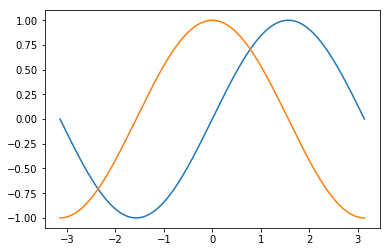

In [5]:
plt.plot(t,s)
plt.plot(t,c)

In [110]:
plt.show()

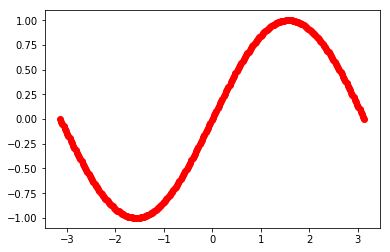

In [6]:
plt.plot(t, s, 'ro')

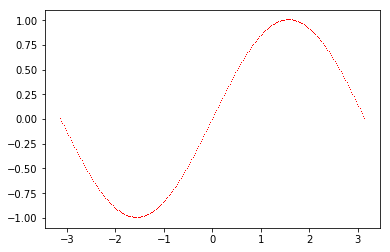

In [7]:
plt.plot(t, s, 'r,')

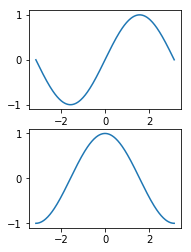

In [10]:
plt.subplot(2,2,1)
plt.plot(t,s)
plt.subplot(2,2,3)
plt.plot(t,c)